## Data Analytics Internship at Oasis Infobyte

### PROJECT 3 PROPOSAL LEVEL-1

### NAME : LOGAPRIYA S

## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Dataset

In [26]:
df = pd.read_csv('AB_NYC_2019.csv')


## Data Exploration

In [27]:
# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [28]:
# Display first few rows
print("\nFirst few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149     

In [29]:
# Display summary statistics
print("\nSummary statistics of the DataFrame:")
print(df.describe())


Summary statistics of the DataFrame:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442  

## Missing Data Handling

In [30]:
# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [31]:
# Handle missing values
# Option 1: Drop rows with missing values
df_dropped_na = df.dropna()

In [32]:
# Option 2: Fill missing values with the mean for numeric columns
df_filled_na = df.copy()
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled_na[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [33]:
# For object columns, fill missing values with the mode
object_columns = df.select_dtypes(include=[object]).columns
df_filled_na[object_columns] = df[object_columns].fillna(df[object_columns].mode().iloc[0])

print("\nDataFrame info after handling missing values:")
print(df_filled_na.info())


DataFrame info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null

## Duplicate Removal

In [34]:
# Remove duplicates
df_filled_na = df_filled_na.drop_duplicates()

print("\nDataFrame info after removing duplicates:")
print(df_filled_na.info())


DataFrame info after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  in

## Standardization

In [35]:
# Standardize data (if needed)
# Convert all string columns to lowercase
df_filled_na[object_columns] = df_filled_na[object_columns].apply(lambda x: x.str.lower())


## Outlier Detection

In [36]:
# Detect and handle outliers
# Example using Z-score for numeric columns
from scipy.stats import zscore

z_scores = np.abs(zscore(df_filled_na.select_dtypes(include=[np.number])))
df_no_outliers = df_filled_na[(z_scores < 3).all(axis=1)]

print("\nDataFrame info after handling outliers:")
print(df_no_outliers.info())


DataFrame info after handling outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 44468 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44468 non-null  int64  
 1   name                            44468 non-null  object 
 2   host_id                         44468 non-null  int64  
 3   host_name                       44468 non-null  object 
 4   neighbourhood_group             44468 non-null  object 
 5   neighbourhood                   44468 non-null  object 
 6   latitude                        44468 non-null  float64
 7   longitude                       44468 non-null  float64
 8   room_type                       44468 non-null  object 
 9   price                           44468 non-null  int64  
 10  minimum_nights                  44468 non-null  int64  
 11  number_of_reviews               44468 non-null  int64  
 

In [37]:
# Final data integrity check
print("\nFinal DataFrame info:")
print(df_no_outliers.info())


Final DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 44468 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44468 non-null  int64  
 1   name                            44468 non-null  object 
 2   host_id                         44468 non-null  int64  
 3   host_name                       44468 non-null  object 
 4   neighbourhood_group             44468 non-null  object 
 5   neighbourhood                   44468 non-null  object 
 6   latitude                        44468 non-null  float64
 7   longitude                       44468 non-null  float64
 8   room_type                       44468 non-null  object 
 9   price                           44468 non-null  int64  
 10  minimum_nights                  44468 non-null  int64  
 11  number_of_reviews               44468 non-null  int64  
 12  last_review   

In [38]:
# Display cleaned data summary statistics
print("\nSummary statistics of the cleaned DataFrame:")
print(df_no_outliers.describe())


Summary statistics of the cleaned DataFrame:
                 id       host_id      latitude     longitude         price  \
count  4.446800e+04  4.446800e+04  44468.000000  44468.000000  44468.000000   
mean   1.896101e+07  6.519758e+07     40.729944    -73.954840    138.589390   
std    1.082741e+07  7.717778e+07      0.053800      0.036327    107.744139   
min    2.539000e+03  2.438000e+03     40.565460    -74.090010      0.000000   
25%    9.572080e+06  7.629362e+06     40.690548    -73.982393     69.000000   
50%    1.956339e+07  2.910111e+07     40.723580    -73.955760    105.000000   
75%    2.875658e+07  1.013813e+08     40.763820    -73.938020    175.000000   
max    3.648724e+07  2.743213e+08     40.892450    -73.813710    860.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    44468.000000       44468.000000       44468.000000   
mean         5.882995          17.974319           1.195918   
std          8.800342          29.476703           1.

In [39]:
# Save the cleaned dataset
df_no_outliers.to_csv('cleaned_AB_NYC_2019.csv', index=False)

## Visualization

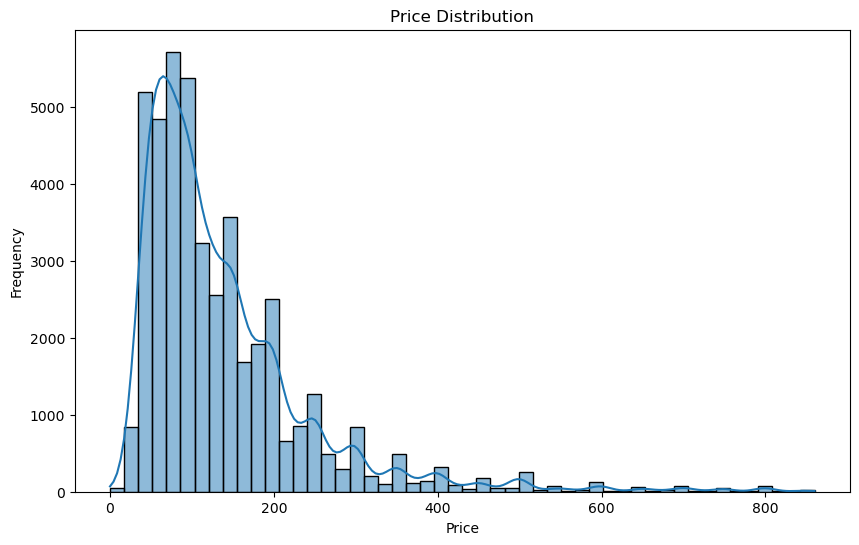

In [40]:
# Visualize cleaned data
# Histogram of 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

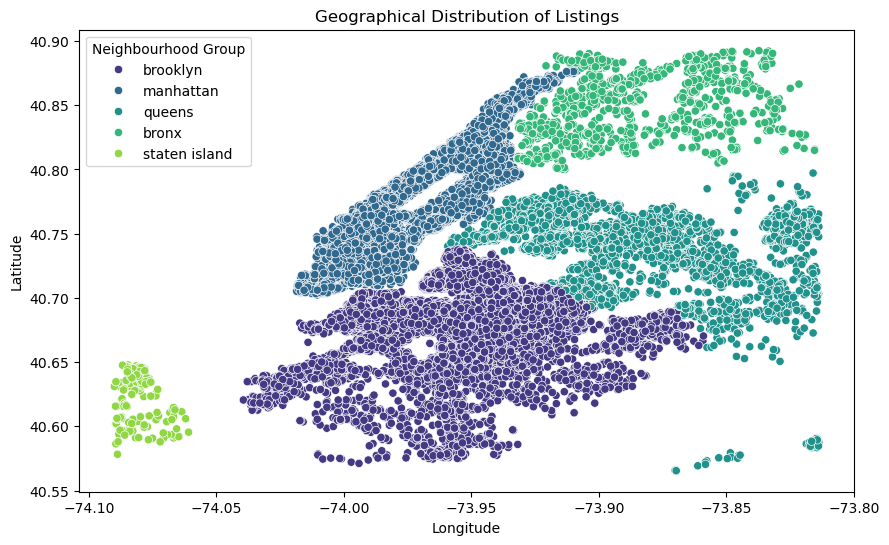

In [41]:
# Scatter plot of 'latitude' vs 'longitude'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df_no_outliers, palette='viridis')
plt.title('Geographical Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.show()